In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle as pkl

In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Statistical analysis of the data

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
target_vals = df['Outcome'].value_counts()
target_vals

Outcome
0    500
1    268
Name: count, dtype: int64

- 0 --> Non-diabetic patients
- 1 --> Diabetic patients

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


- Above table shows that the mean of all the features is higher for diabetic patients than non-diabetic patients. This means that the diabetic patients have higher values of all the features than non-diabetic patients.

- Moreover, people with diabetes have much higher value of glucose and insulin than people without diabetes.

<Axes: >

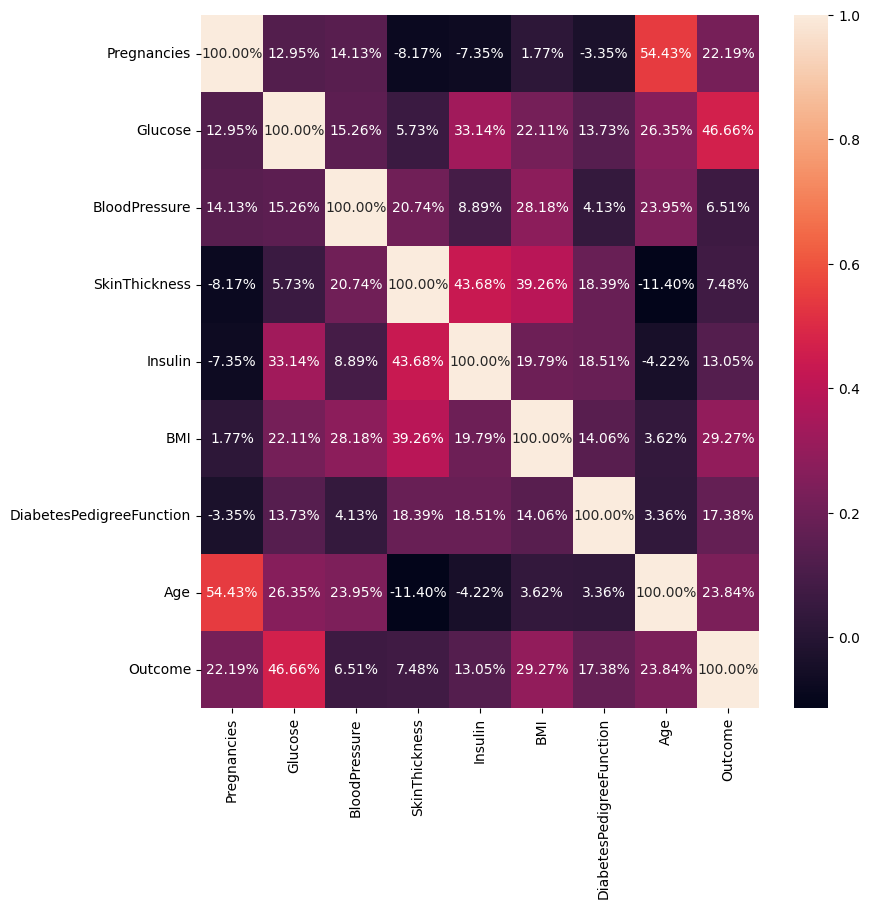

In [11]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, fmt='.2%')

- All the columns are moderately correlated

In [12]:
print("Percentage of patients without diabetes: " , round(target_vals[0]/len(df.Outcome), 2)*100)
print("Percentage of patients with diabetes: " , round(target_vals[1]/len(df.Outcome), 2)*100)

Percentage of patients without diabetes:  65.0
Percentage of patients with diabetes:  35.0


- Separating data and labels

In [13]:
x = df.drop(columns='Outcome', axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

- Data Standardization

In [15]:
scalar = StandardScaler()

In [16]:
scalar.fit(x)

StandardScaler()

In [17]:
standardized_data = scalar.transform(x)
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [51]:
pkl.dump(scalar, open('scaler.pkl', 'wb'))
scalar

StandardScaler()

In [18]:
X = standardized_data
Y = df['Outcome']

- train test split


In [19]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, stratify=y, random_state = 2)

In [20]:
train_x.shape

(614, 8)

In [21]:
test_x.shape

(154, 8)

In [22]:
train_y.shape

(614,)

In [23]:
test_y.shape

(154,)

- Model Training

- LOGISTIC REGRESSION

In [24]:
lr = LogisticRegression()

In [53]:
lr = lr.fit(train_x, train_y)
lr

LogisticRegression()

In [26]:
logistic_train_pred = lr.predict(train_x)
logistic_test_pred = lr.predict(test_x)

In [27]:
print("Logistic Regression Training Accuracy: ", round(accuracy_score(train_y, logistic_train_pred), 2)*100)
print("Logistic Regression Testing Accuracy: ", round(accuracy_score(test_y, logistic_test_pred), 2)*100)

Logistic Regression Training Accuracy:  79.0
Logistic Regression Testing Accuracy:  76.0


In [54]:
pkl.dump(lr, open('lr.pkl', 'wb'))
lr

LogisticRegression()

- NAIVE BAYES

In [28]:
nb = GaussianNB()

In [29]:
nb.fit(train_x, train_y)

GaussianNB()

In [30]:
naive_train_pred = nb.predict(train_x)
naive_test_pred = nb.predict(test_x)

In [31]:
print("Naive Bayes Training Accuracy: ", round(accuracy_score(train_y, naive_train_pred), 2)*100)
print("Naive Bayes Testing Accuracy: ", round(accuracy_score(test_y, naive_test_pred), 2)*100)

Naive Bayes Training Accuracy:  76.0
Naive Bayes Testing Accuracy:  77.0


- KNN

In [32]:
knn = KNeighborsClassifier(n_neighbors=50)

In [33]:
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=50)

In [34]:
knn_train_pred = knn.predict(train_x)
knn_test_pred = knn.predict(test_x)

In [35]:
print("KNN Training Accuracy: ", round(accuracy_score(train_y, knn_train_pred), 2)*100)
print("KNN Testing Accuracy: ", round(accuracy_score(test_y, knn_test_pred), 2)*100)

KNN Training Accuracy:  77.0
KNN Testing Accuracy:  73.0


- Decision Trees

In [36]:
max_accuracy = 0   
for i in range(2000):
    clf = DecisionTreeClassifier(random_state = i)
    clf.fit(train_x, train_y)
    pred = clf.predict(test_x)
    current_accuracy = round(accuracy_score(pred, test_y)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_random_state = i

# print("Best Random State: ", best_random_state)
# print("Best Accuracy: ", max_accuracy)

clf = DecisionTreeClassifier(random_state = best_random_state)
clf.fit(train_x, train_y)

DecisionTreeClassifier(random_state=91)

[Text(0.453125, 0.96875, 'x[1] <= 0.207\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.20545212765957446, 0.90625, 'x[7] <= -0.403\ngini = 0.296\nsamples = 388\nvalue = [318, 70]'),
 Text(0.10638297872340426, 0.84375, 'x[5] <= 1.702\ngini = 0.151\nsamples = 219\nvalue = [201, 18]'),
 Text(0.0851063829787234, 0.78125, 'x[0] <= 1.085\ngini = 0.13\nsamples = 215\nvalue = [200, 15]'),
 Text(0.07446808510638298, 0.71875, 'x[5] <= -0.132\ngini = 0.122\nsamples = 214\nvalue = [200.0, 14.0]'),
 Text(0.02127659574468085, 0.65625, 'x[6] <= 0.592\ngini = 0.016\nsamples = 122\nvalue = [121, 1]'),
 Text(0.010638297872340425, 0.59375, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(0.031914893617021274, 0.59375, 'x[6] <= 0.648\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.02127659574468085, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0425531914893617, 0.53125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.1276595744680851, 0.65625, 'x[6] <= 0.573

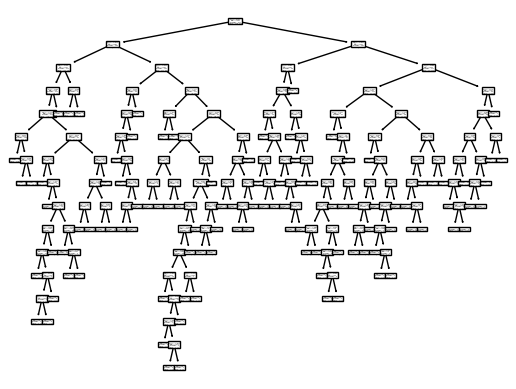

In [37]:
tree.plot_tree(clf)

In [38]:
decision_train_pred = clf.predict(train_x)
decision_test_pred = clf.predict(test_x)

In [39]:
print("Decision Tree Training Accuracy: ", round(accuracy_score(train_y, decision_train_pred), 2)*100)
print("Decision Tree Testing Accuracy: ", round(accuracy_score(test_y, decision_test_pred), 2)*100)

Decision Tree Training Accuracy:  100.0
Decision Tree Testing Accuracy:  73.0


- Random Forest

In [40]:
rf = RandomForestClassifier(n_estimators=500, random_state = best_random_state)

In [41]:
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500, random_state=91)

In [42]:
rf_train_pred = rf.predict(train_x)
rf_test_pred = rf.predict(test_x)

In [43]:
print("Random Forest Training Accuracy: ", round(accuracy_score(train_y, rf_train_pred), 2)*100)
print("Random Forest Testing Accuracy: ", round(accuracy_score(test_y, rf_test_pred), 2)*100)

Random Forest Training Accuracy:  100.0
Random Forest Testing Accuracy:  73.0


- SVM

In [44]:
classifier = SVC(kernel = 'linear')

In [45]:
classifier.fit(train_x, train_y)

SVC(kernel='linear')

In [46]:
print("SVM Training Accuracy: ", round(classifier.score(train_x, train_y)*100, 2))
print("SVM Testing Accuracy: ", round(classifier.score(test_x, test_y)*100, 2))

SVM Training Accuracy:  78.66
SVM Testing Accuracy:  77.27


In [47]:
input_data = (10,139,80,0,0,27.1,1.441,57)
data = np.array(input_data)
data

array([ 10.   , 139.   ,  80.   ,   0.   ,   0.   ,  27.1  ,   1.441,
        57.   ])

In [48]:
std_data = scalar.transform(data.reshape(1, -1))

d:\Programming lang\PYTHON\Python Interface\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
prediction = classifier.predict(std_data)
prediction

array([1], dtype=int64)

In [50]:
if prediction == 1:
    print("The patient has diabetes")
else:
    print("The patient does not have diabetes")

The patient has diabetes


In [55]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')